In [4]:
import time
import re
import bisect

import numpy as np

from dasly.master import Dasly
from dasly.simpledas import simpleDASreader
from dasly import loader

In [5]:
folder_path = '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard'
start = '20240818 152603'
duration = 30

In [10]:
file_paths = [
    # '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152603.hdf5',
    # '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152613.hdf5',
    # '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152623.hdf5',
    # '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152633.hdf5',
    # '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152643.hdf5',
    # '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152653.hdf5',
    # '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152703.hdf5',
    # '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152713.hdf5',
    '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152723.hdf5',
    '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152733.hdf5',
    '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152743.hdf5',
    # '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152753.hdf5',
    # '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152803.hdf5',
    # '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152813.hdf5',
    # '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152823.hdf5',
    # '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152833.hdf5',
    # '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152843.hdf5',
]

In [17]:
simpleDASreader.find_DAS_files(folder_path, start, duration)

-- Header info file: 152603.hdf5 --
	Experiment:            Svalbard_field_test_jun_aug_GL_8_dec_4_Ytre_IndreKabel
	File timestamp:        2024-08-18 15:26:03
	Type of data:          Phase rate per distance, unit: rad/(s*m)
	Sampling frequency:    312.50 Hz
	Data shape:            3125 samples x 12752 channels
	Gauge length:          4.1 m
	Sensitivities:         9.36e+06 rad/(strain*m)
	Regions of interest:   0:51004:4
-----------------------------------


(['/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152603.hdf5',
  '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152613.hdf5',
  '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152623.hdf5',
  '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20240818/dphi/152633.hdf5'],
 array([    0,     1,     2, ..., 12749, 12750, 12751]),
 slice(0, 9375, None))

In [11]:
s_rate = 0.25
das = Dasly()
das.load_data(
    file_paths=file_paths,
    # start=start,
    # duration=duration,
    # start_exact_second=False,
    integrate=True,
    chIndex=np.arange(round(40000 * s_rate), round(90000 * s_rate))
)

3 files, from 152723 to 152743


vmin: -1.18e-07, vmax: 1.18e-07


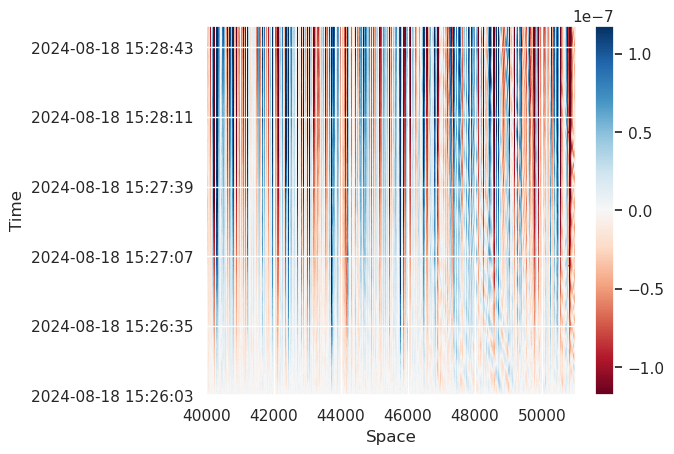

In [8]:
das.heatmap()

Signal updated with high-pass filter.


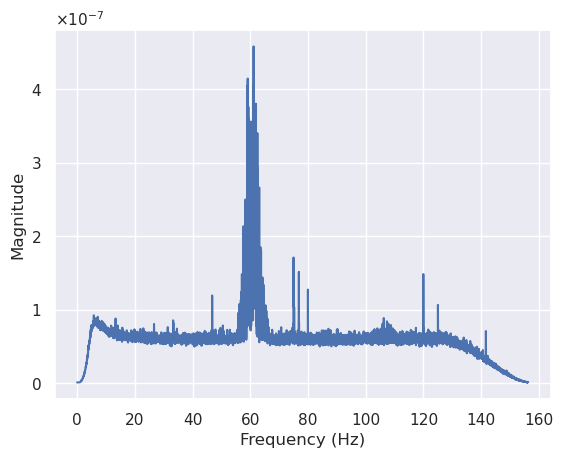

In [73]:
das.reset()
das.highpass_filter(cutoff=5)
das.fft()

In [46]:
# das.reset()
# das.bandpass_filter(5, 100)
# das.fft()

Signal updated with band-pass filter.


time_bandpass: 0.23332667350769043


vmin: -3.19e-10, vmax: 3.19e-10


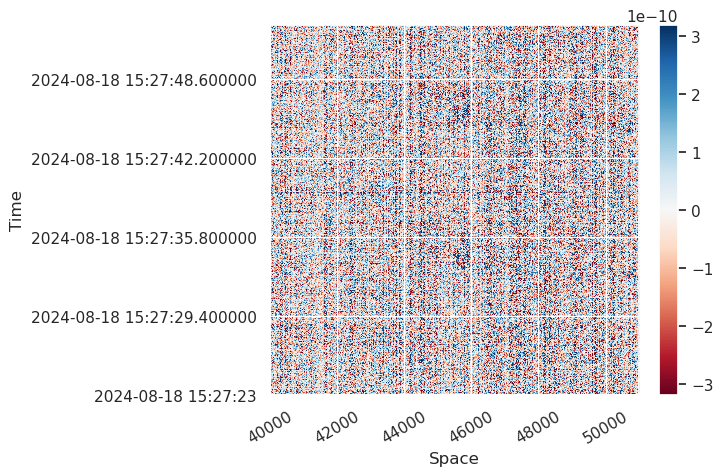

In [16]:
das.reset()
start_time = time.time()
das.bandpass_filter(18, 28)
time_bandpass = time.time()
print(f'time_bandpass: {time_bandpass - start_time}')
das.heatmap(xticks_rotate=30)

time_abs: 0.05370283126831055


vmax: 3.19e-10


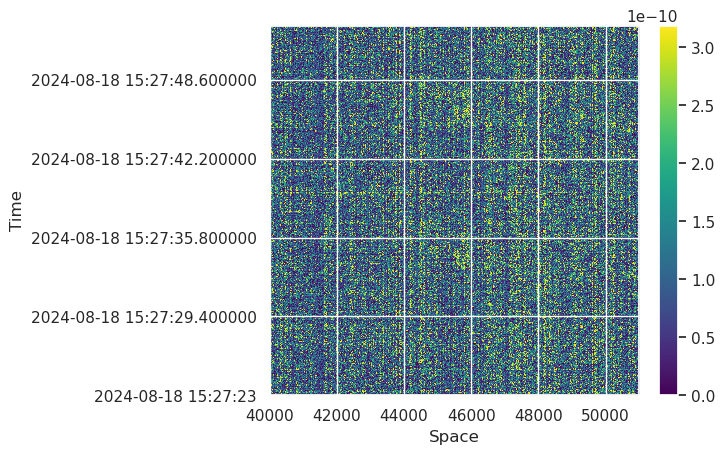

In [18]:
start_time = time.time()
das.signal = np.abs(das.signal)
time_abs = time.time()
print(f'time_abs: {time_abs - start_time}')
das.heatmap()

In [ ]:
start_time = time.time()
das.signal = np.abs(das.signal)
time_abs = time.time()
print(f'time_abs: {time_abs - start_time}')
das.heatmap()

vmax: 3.05e-10


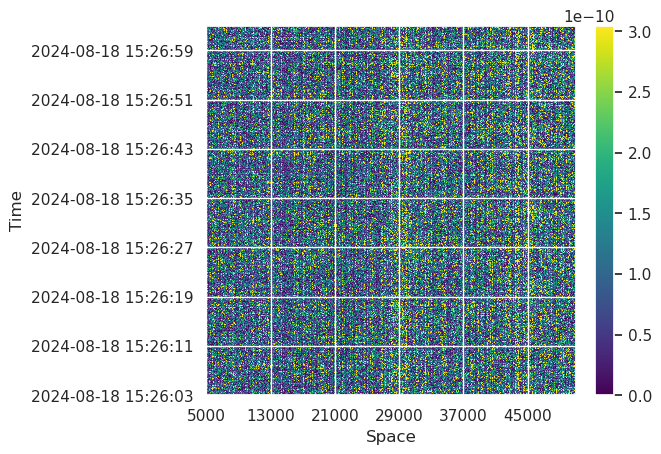

In [88]:
start_time = time.time()
das.signal = np.abs(das.signal)
time_abs = time.time()
print(f'time_abs: {time_abs - start_time}')
das.heatmap()

Signal updated with new temporal sampling rate 26 and new spatial sampling rate 0.010.
vmax: 1.54e-10


time_sample: 51.12261152267456


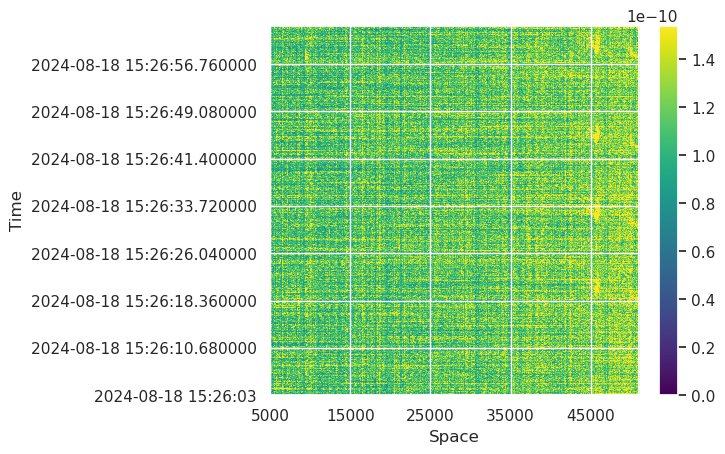

In [89]:
das.sample(meters=100, seconds=1/25)
time_sample = time.time()
print(f'time_sample: {time_sample - time_abs}')
das.heatmap()

Signal updated with Gaussian smoothing.
vmax: 1.3e-10


time_gauss: 0.40334582328796387


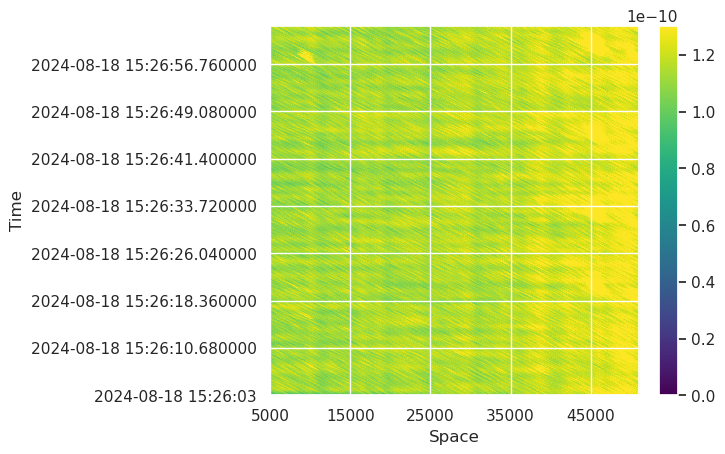

In [90]:
das.gaussian_smooth(-1500.01, -1500, unit='m/s', std_s=500)
time_gauss = time.time()
print(f'time_gauss: {time_gauss - time_sample}')
das.heatmap()

Signal updated with Sobel filter.
vmax: 3.16e-11


time_sobel: 0.35197901725769043


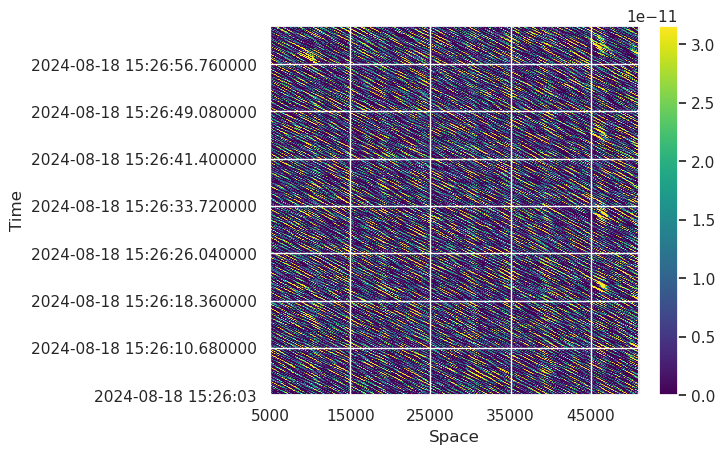

In [91]:
das.sobel_filter(pos_grads=True)
time_sobel = time.time()
print(f'time_sobel: {time_sobel - time_gauss}')
das.heatmap()

Signal updated with binary transform with threshold 2.1e-11.


time_binary: 10.13079285621643


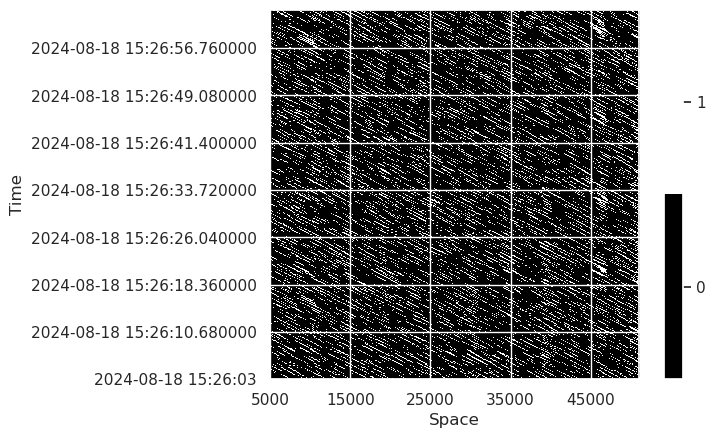

In [92]:
das.binary_transform(threshold=2.1e-11)
time_binary = time.time()
print(f'time_binary: {time_binary - time_sobel}')
das.heatmap()

11 lines are detected.


time_hough: 13.743796110153198


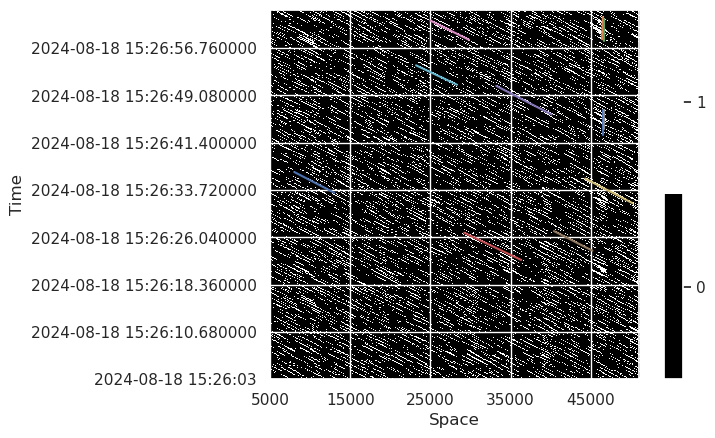

In [93]:
das.hough_transform(
    target_speed=(1500+1500.01)/2,
    speed_res=10,
    length_meters=4000,
    threshold_percent=0.8,
    max_line_gap_percent=0.1,
    speed_unit='m/s',    
)
time_hough = time.time()
print(f'time_hough: {time_hough - time_binary}')
das.heatmap()

time_dbscan: 1.2807259559631348


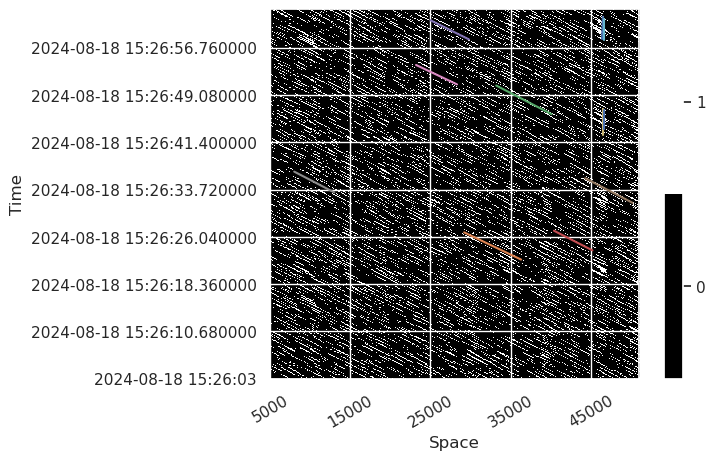

In [94]:
das.dbscan(eps_seconds=3)
time_dbscan = time.time()
print(f'time_dbscan: {time_dbscan - time_hough}')
das.heatmap(xticks_rotate=30)

In [9]:
das.lines_df

,speed_kmh,speed_ms,s,t,s1,t1,s2,t2,s1_edge,t1_edge,...,x1,y1,x2,y2,x1_edge,y1_edge,x2_edge,y2_edge,y1_edge_ext,y2_edge_ext
0,-4581.818182,-1272.727273,-5600.0,4.40,74100.0,2022-08-22 12:29:08.440,68500.0,2022-08-22 12:29:12.840,89900.000000,2022-08-22 12:28:56.025714286,...,691.0,736.0,635.0,846.0,849.000000,425.642857,557.109091,999.000000,2093.321429,425.642857
1,-5155.339806,-1432.038835,-5900.0,4.12,76100.0,2022-08-22 12:28:56.440,70200.0,2022-08-22 12:29:00.560,89900.000000,2022-08-22 12:28:46.803389831,...,711.0,436.0,652.0,539.0,849.000000,195.084746,388.504854,999.000000,1677.237288,195.084746
2,-5294.117647,-1470.588235,-5000.0,3.40,56500.0,2022-08-22 12:29:03.480,51500.0,2022-08-22 12:29:06.880,89900.000000,2022-08-22 12:28:40.768000000,...,515.0,612.0,465.0,697.0,849.000000,44.200000,287.352941,999.000000,1487.500000,44.200000
3,-5379.310345,-1494.252874,-5200.0,3.48,56400.0,2022-08-22 12:28:51.040,51200.0,2022-08-22 12:28:54.520,74390.804598,2022-08-22 12:28:39.000000000,...,514.0,301.0,462.0,388.0,693.908046,0.000000,96.804598,999.000000,1160.961538,-259.480769
4,-5931.818182,-1647.727273,-5800.0,3.52,56800.0,2022-08-22 12:28:39.040,51000.0,2022-08-22 12:28:42.560,56865.909091,2022-08-22 12:28:39.000000000,...,518.0,1.0,460.0,89.0,518.659091,0.000000,0.000000,786.931034,786.931034,-501.206897
